In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('Shark_finish.csv', encoding='ISO-8859-1', low_memory=False)



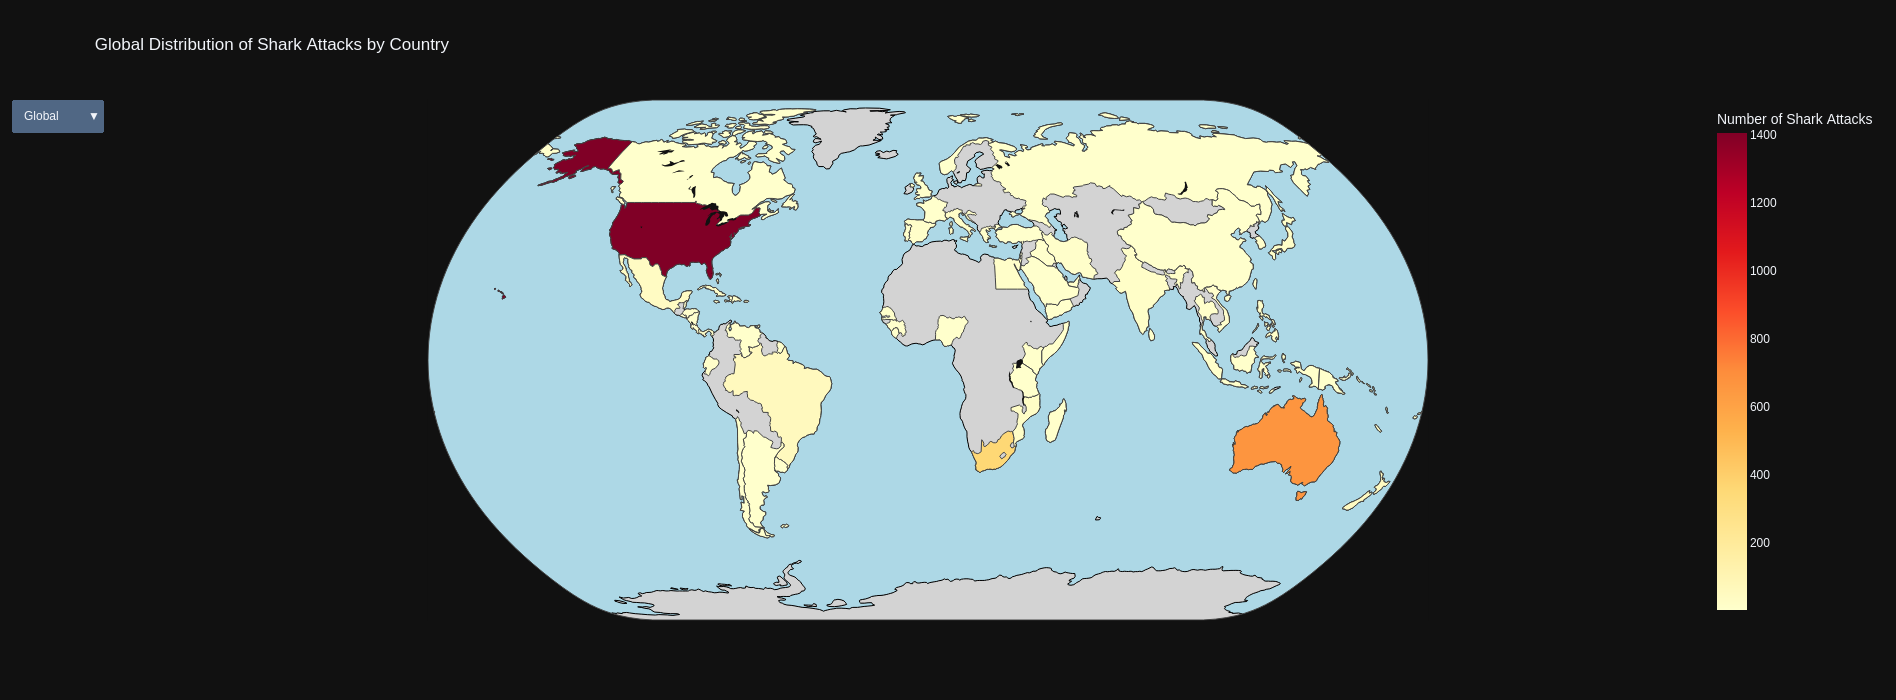

Top 10 Countries with Most Shark Attacks:
Country_Mapped
United States       1404
Australia            666
South Africa         355
Bahamas               65
Brazil                56
New Zealand           45
Papua New Guinea      41
Mexico                38
Réunion               34
Fiji                  30
Name: count, dtype: int64


In [54]:
import pandas as pd
import plotly.express as px

# Assuming 'df' is your DataFrame with shark attack data

# Sample data if not available
# df = pd.DataFrame({'Country': ['USA', 'AUSTRALIA', 'SOUTH AFRICA', 'USA', 'USA', 'BRAZIL', 'MEXICO', 'FIJI']})

# Create a dictionary to map custom country names in 'df' to standardized names in the 'plotly' dataset
country_mapping = {
    'USA': 'United States',
    'AUSTRALIA': 'Australia',
    'SOUTH AFRICA': 'South Africa',
    'NEW ZEALAND': 'New Zealand',
    'BRAZIL': 'Brazil',
    'MEXICO': 'Mexico',
    'FIJI': 'Fiji',
    'BAHAMAS': 'Bahamas',
    'PAPUA NEW GUINEA': 'Papua New Guinea',
    'REUNION': 'Réunion'  # Adjusted for plotly's naming convention
}

# Map the countries in 'df' to standardized names
df['Country_Mapped'] = df['Country'].map(lambda x: country_mapping.get(x.upper(), x.upper()))

# Create a series of attack counts using standardized country names
attack_counts = df['Country_Mapped'].value_counts()

# Prepare data for plotting by creating a DataFrame with countries and attack counts
attack_df = pd.DataFrame({
    'Country': attack_counts.index,
    'Attack_Counts': attack_counts.values
})

# Plot the map with Plotly's choropleth
fig = px.choropleth(
    attack_df,
    locations='Country',
    locationmode='country names',
    color='Attack_Counts',
    hover_name='Country',
    color_continuous_scale='YlOrRd',
    labels={'Attack_Counts': 'Number of Shark Attacks'},
    title='Global Distribution of Shark Attacks by Country',
    template='plotly_dark'  # Optional: dark theme for better contrast
)

# Add interactive features
fig.update_geos(
    showcoastlines=True,
    coastlinecolor="Black",
    showland=True,
    landcolor="lightgray",
    projection_type='natural earth',  # Better map projection for global data
    showocean=True,
    oceancolor='LightBlue'
)

# Customize hover data
fig.update_traces(
    hovertemplate='<b>%{hovertext}</b><br>Attacks: %{z}'
)

# Add buttons to zoom in on regions, including Africa
fig.update_layout(
    updatemenus=[
        {
            'buttons': [
                {'method': 'relayout', 'label': 'Global', 'args': [{'geo': {'projection.scale': 1}}]},
                {'method': 'relayout', 'label': 'Americas', 'args': [{'geo': {'projection.scale': 3, 'center': {'lat': 10, 'lon': -75}}}]},
                {'method': 'relayout', 'label': 'Europe', 'args': [{'geo': {'projection.scale': 3, 'center': {'lat': 50, 'lon': 10}}}]},
                {'method': 'relayout', 'label': 'Australia', 'args': [{'geo': {'projection.scale': 3, 'center': {'lat': -25, 'lon': 133}}}]},
                {'method': 'relayout', 'label': 'Africa', 'args': [{'geo': {'projection.scale': 3, 'center': {'lat': 0, 'lon': 20}}}]}
            ],
            'direction': 'down',
            'showactive': True
        }
    ],
    autosize=False,
    width=1200,
    height=700
)

# Show the figure
fig.show()

# Display top 10 countries with the most attacks
print("Top 10 Countries with Most Shark Attacks:")
print(attack_counts.head(10))


In [33]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

def clean_and_prepare_data(df):
    """Clean and prepare the dataset for analysis"""
    # Create a copy to avoid modifying original data
    df = df.copy()
    
    # Convert Age to numeric, handling non-numeric values
    df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
    
    # Ensure Fatal column is properly formatted
    if 'Fatal (Y/N)' in df.columns:
        df['Fatal'] = df['Fatal (Y/N)'].map({'Y': True, 'N': False}).fillna(False)
    
    # Clean up country names and standardize casing
    if 'Country' in df.columns:
        df['Country'] = df['Country'].str.strip().str.title()
    
    # Clean up activity names
    if 'Activity' in df.columns:
        df['Activity'] = df['Activity'].str.strip().str.title()
    
    # Ensure proper month formatting
    if 'Month' in df.columns:
        # Convert month names to numbers if needed
        month_map = {
            'January': 1, 'February': 2, 'March': 3, 'April': 4,
            'May': 5, 'June': 6, 'July': 7, 'August': 8,
            'September': 9, 'October': 10, 'November': 11, 'December': 12
        }
        if df['Month'].dtype == 'O':  # If month is object/string type
            df['Month'] = df['Month'].map(month_map)
    
    return df

def create_temporal_trend(df):
    """Create temporal trend visualization"""
    if 'Year' not in df.columns:
        return None
        
    yearly_attacks = df['Year'].value_counts().sort_index()
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=yearly_attacks.index,
        y=yearly_attacks.values,
        mode='lines+markers',
        name='Number of Attacks'
    ))
    fig.update_layout(
        title='Temporal Trend of Shark Attacks',
        xaxis_title='Year',
        yaxis_title='Number of Attacks',
        template='plotly_white',
        width=800,
        height=400
    )
    return fig

def analyze_attacks_by_country(df, top_n=10):
    """Analyze attacks by country"""
    if 'Country' not in df.columns:
        return None
        
    country_counts = df['Country'].value_counts().head(top_n)
    fig = px.bar(
        x=country_counts.index,
        y=country_counts.values,
        labels={'x': 'Country', 'y': 'Number of Attacks'},
        title=f'Top {top_n} Countries with Highest Number of Shark Attacks'
    )
    fig.update_layout(
        template='plotly_white',
        width=800,
        height=400
    )
    return fig, country_counts

def analyze_attack_types(df, top_n_countries=3):
    """Analyze attack types by country"""
    if not all(col in df.columns for col in ['Country', 'Type']):
        return None
        
    top_countries = df['Country'].value_counts().head(top_n_countries).index
    type_by_country = df[df['Country'].isin(top_countries)].groupby(['Country', 'Type']).size().unstack(fill_value=0)
    
    fig = go.Figure()
    for country in top_countries:
        fig.add_trace(go.Bar(
            name=country,
            x=type_by_country.columns,
            y=type_by_country.loc[country]
        ))
    
    fig.update_layout(
        title=f'Type of Attacks in Top {top_n_countries} Countries',
        xaxis_title='Attack Type',
        yaxis_title='Number of Attacks',
        barmode='group',
        template='plotly_white',
        width=800,
        height=400
    )
    return fig, type_by_country

def analyze_demographics(df):
    """Analyze demographics (sex and age)"""
    results = {}
    
    # Sex analysis
    if 'Sex' in df.columns:
        sex_counts = df['Sex'].value_counts()
        fig_sex = px.pie(
            values=sex_counts.values,
            names=sex_counts.index,
            title='Distribution of Shark Attacks by Sex'
        )
        fig_sex.update_layout(width=600, height=400)
        results['sex'] = {'figure': fig_sex, 'data': sex_counts}
    
    # Age analysis
    if 'Age' in df.columns:
        # Create age groups
        bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
        labels = ['0-10', '11-20', '21-30', '31-40', '41-50', 
                 '51-60', '61-70', '71-80', '81-90', '91-100']
        df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
        
        age_group_counts = df['Age_Group'].value_counts().sort_index()
        fig_age = px.bar(
            x=age_group_counts.index,
            y=age_group_counts.values,
            title='Distribution of Shark Attacks by Age Group',
            labels={'x': 'Age Group', 'y': 'Number of Attacks'}
        )
        fig_age.update_layout(width=800, height=400)
        
        age_stats = df['Age'].describe()
        results['age'] = {
            'figure': fig_age,
            'counts': age_group_counts,
            'stats': age_stats
        }
    
    return results

def analyze_activities(df):
    """Analyze activities and their relationships with age groups"""
    if 'Activity' not in df.columns:
        return None
        
    # Get top activities
    activity_counts = df['Activity'].value_counts()
    top_activities = activity_counts.head().index
    
    # Create activity by age group analysis if age groups exist
    if 'Age_Group' in df.columns:
        activity_age_data = pd.crosstab(df['Age_Group'], df['Activity'])[top_activities]
        
        fig = go.Figure()
        for activity in top_activities:
            fig.add_trace(go.Bar(
                name=activity,
                x=activity_age_data.index,
                y=activity_age_data[activity]
            ))
        
        fig.update_layout(
            title='Distribution of Shark Attacks by Age Group and Activity',
            xaxis_title='Age Group',
            yaxis_title='Number of Attacks',
            barmode='stack',
            template='plotly_white',
            width=1000,
            height=600
        )
        
        return {
            'figure': fig,
            'activity_counts': activity_counts,
            'activity_age_data': activity_age_data
        }
    
    return {'activity_counts': activity_counts}

def analyze_fatalities(df):
    """Analyze fatality statistics"""
    if 'Fatal' not in df.columns:
        return None
        
    total_attacks = len(df)
    fatal_attacks = df['Fatal (Y/N)'].sum()
    non_fatal_attacks = total_attacks - fatal_attacks
    
    # Create pie chart
    fig = go.Figure(data=[go.Pie(
        labels=['Fatal', 'Non-Fatal'],
        values=[fatal_attacks, non_fatal_attacks],
        hole=0.3
    )])
    
    fig.update_layout(
        title='Proportion of Fatal vs Non-Fatal Shark Attacks',
        template='plotly_white',
        width=600,
        height=600
    )




    # Calculate statistics
    stats = pd.DataFrame({
        'Statistic': ['Total Attacks', 'Fatal Attacks', 'Non-Fatal Attacks', 'Fatality Rate (%)'],
        'Value': [
            total_attacks,
            fatal_attacks,
            non_fatal_attacks,
            round((fatal_attacks / total_attacks) * 100, 2)
        ]
    })
    
    return {'figure': fig, 'stats': stats}

def main(df):
    """Main analysis function"""
    # Clean and prepare data
    df_clean = clean_and_prepare_data(df)
    
    # Create all visualizations
    results = {}
    
    # Temporal trend
    results['temporal'] = create_temporal_trend(df_clean)
    
    # Country analysis
    results['country'] = analyze_attacks_by_country(df_clean)
    
    # Attack types
    results['attack_types'] = analyze_attack_types(df_clean)
    
    # Demographics
    results['demographics'] = analyze_demographics(df_clean)
    
    # Activities
    results['activities'] = analyze_activities(df_clean)
    
    # Fatalities
    results['fatalities'] = analyze_fatalities(df_clean)
    
    return results

# Example usage:
if __name__ == "__main__":
    # Assuming df is your DataFrame
    # results = main(df)
    # Access individual analyses through the results dictionary
    pass


📊 SHARK ATTACK ANALYSIS REPORT

📈 1. TEMPORAL ANALYSIS


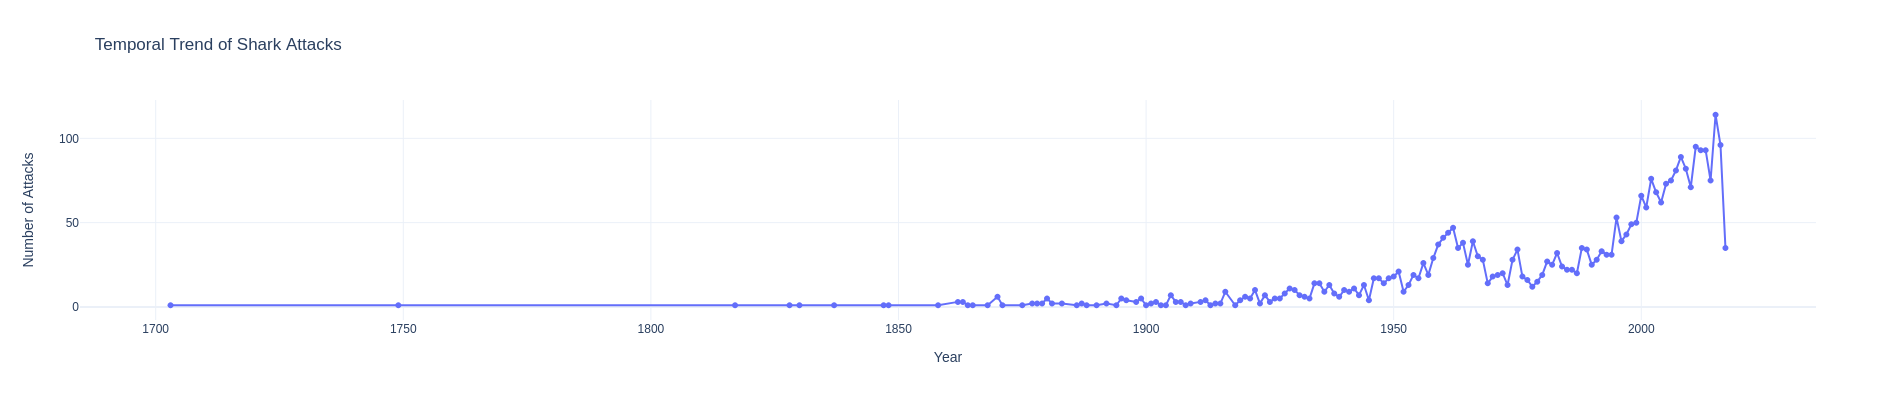

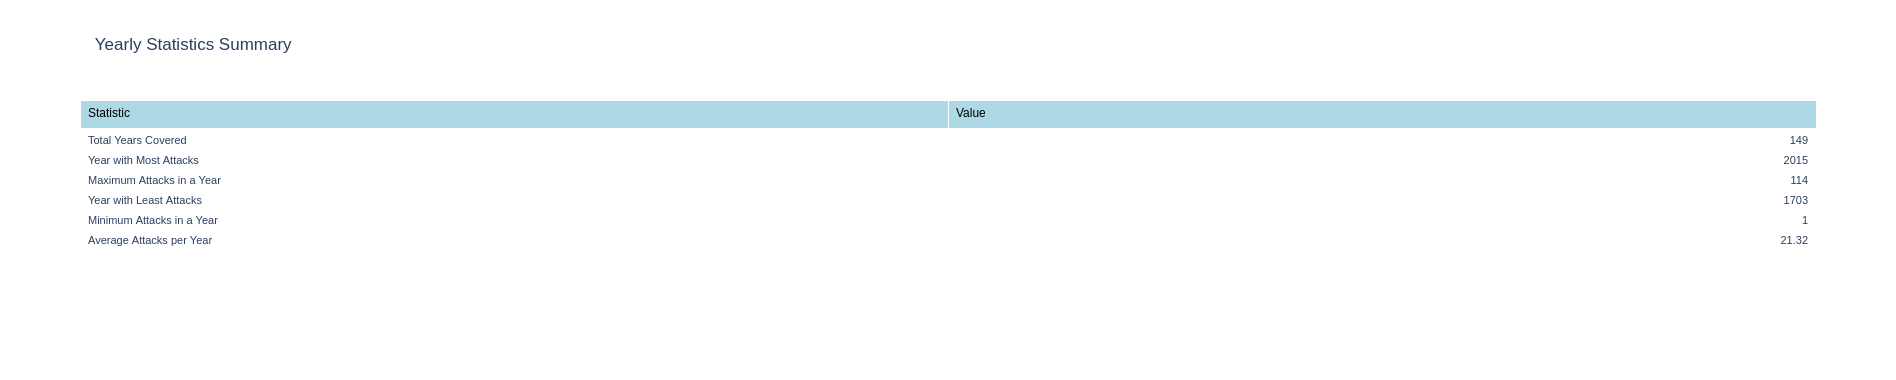


🌎 2. GEOGRAPHIC ANALYSIS


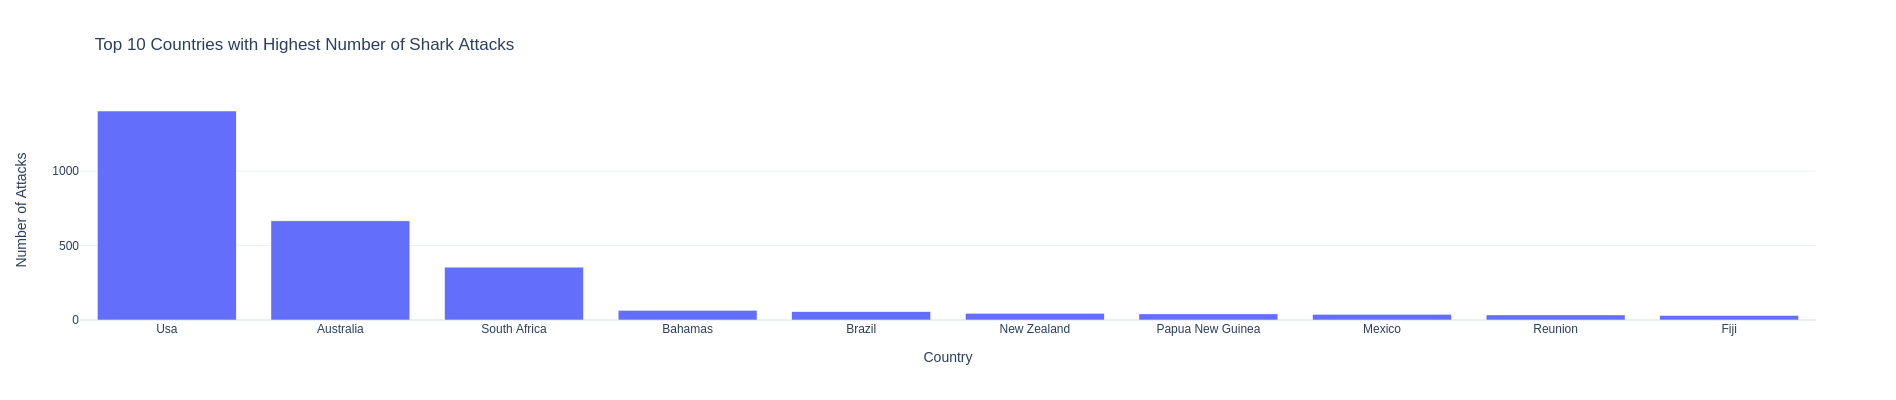

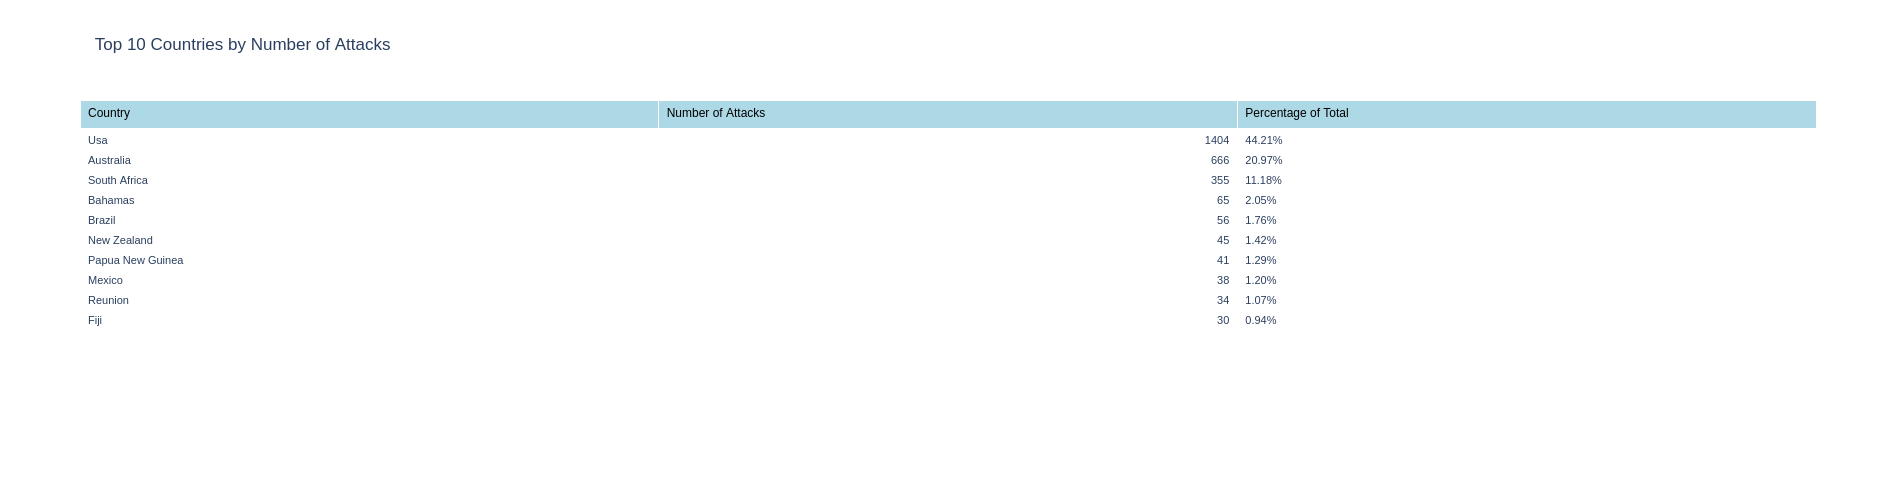

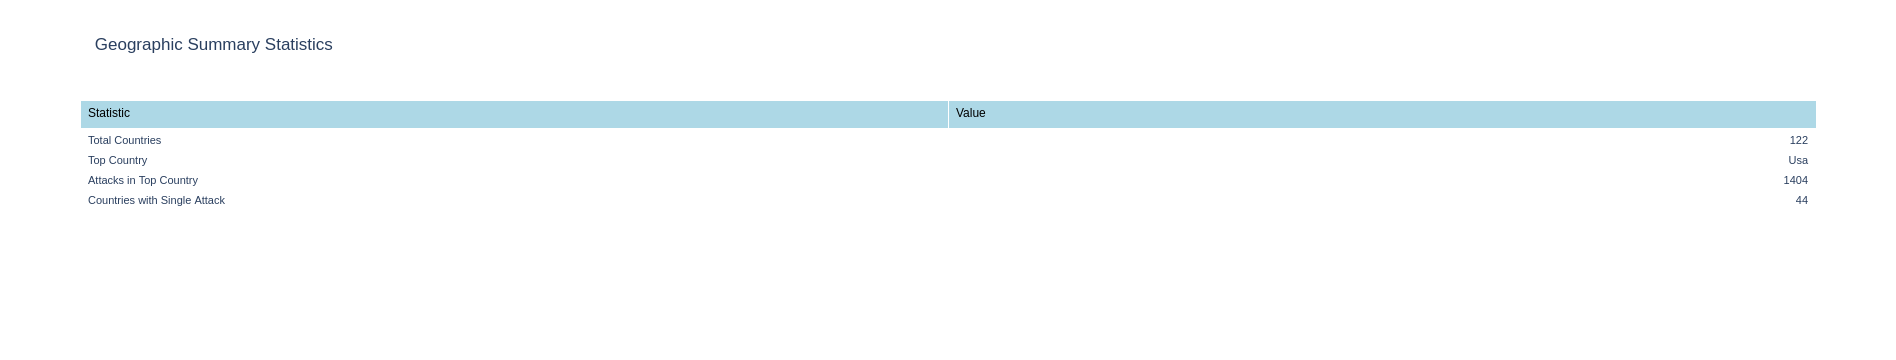


👥 3. DEMOGRAPHIC ANALYSIS

3.1 Analysis by Sex


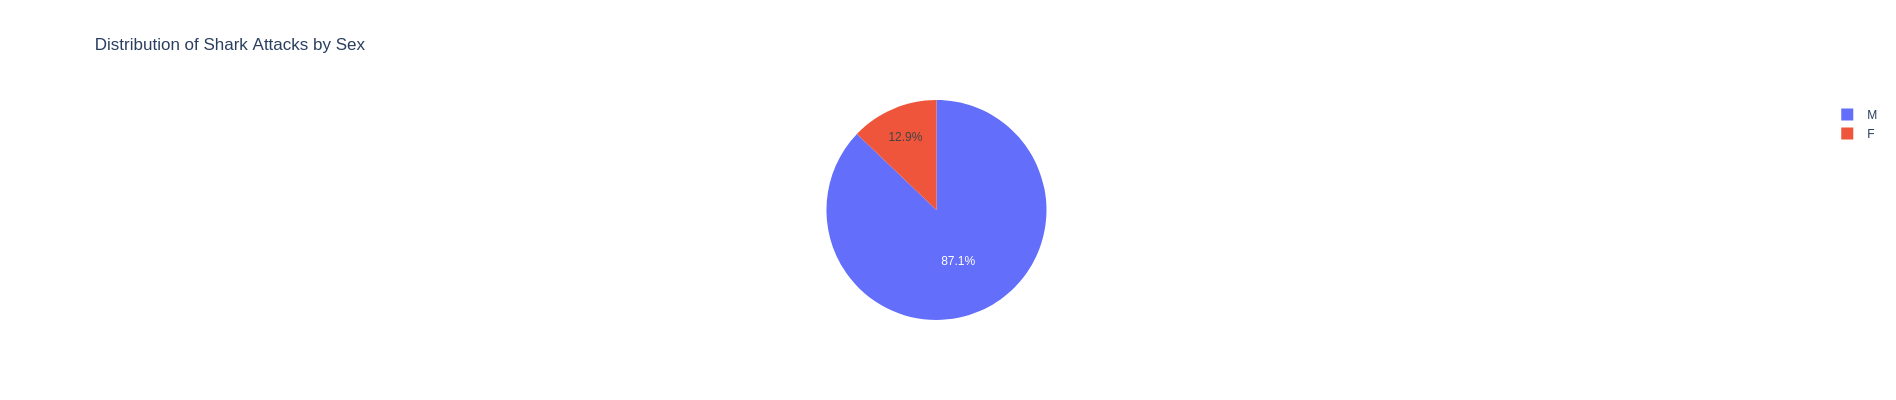

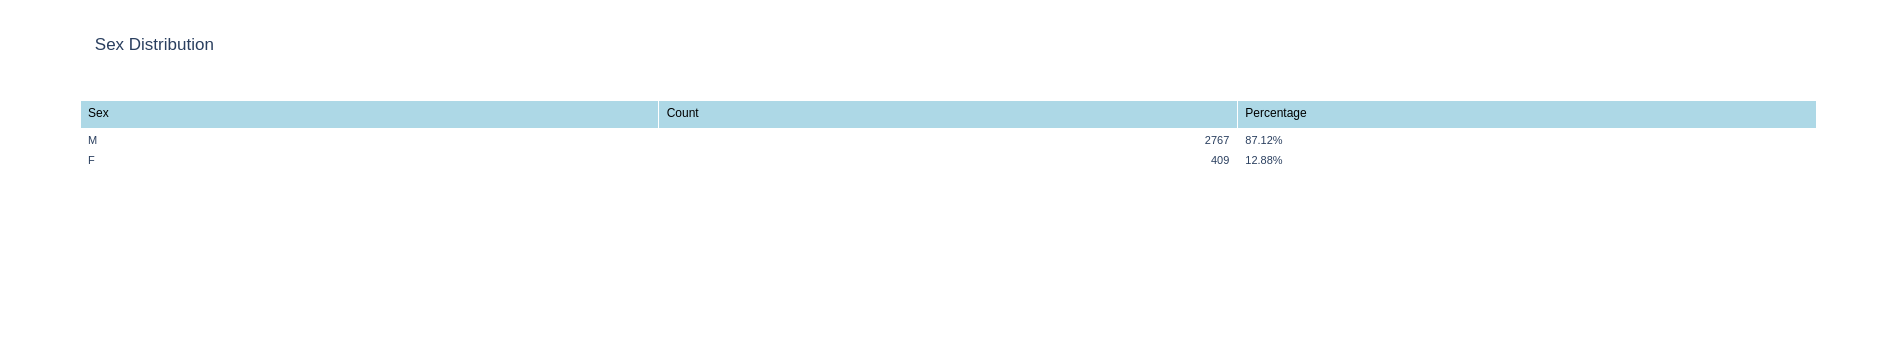


3.2 Analysis by Age


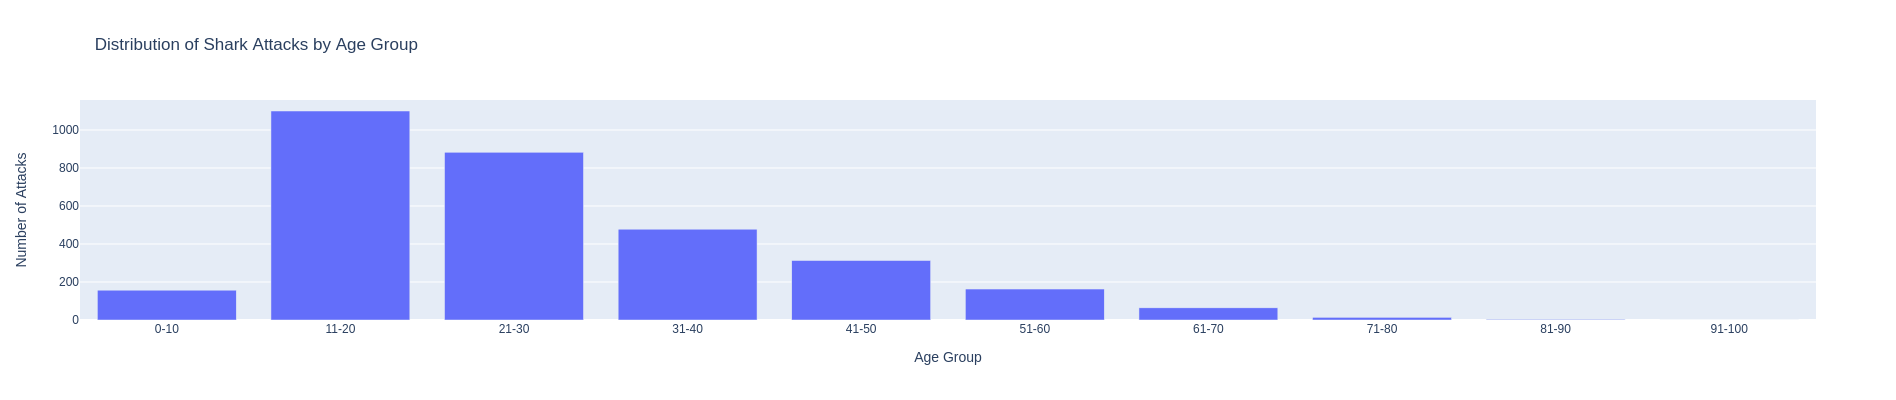

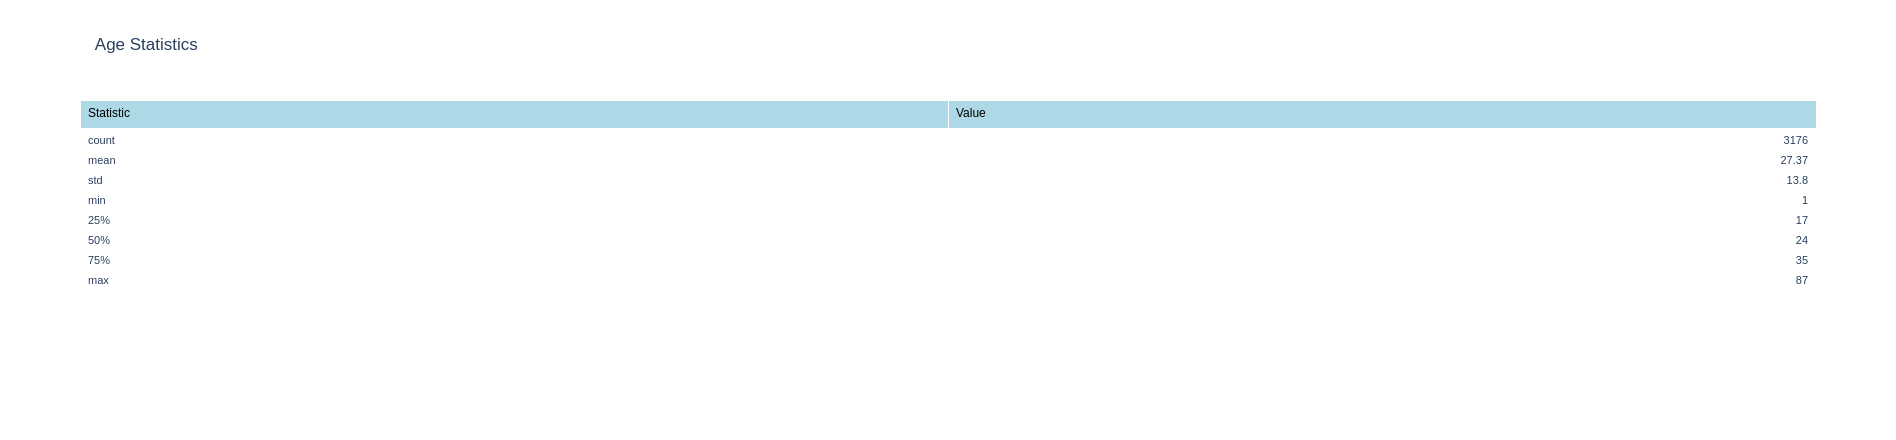

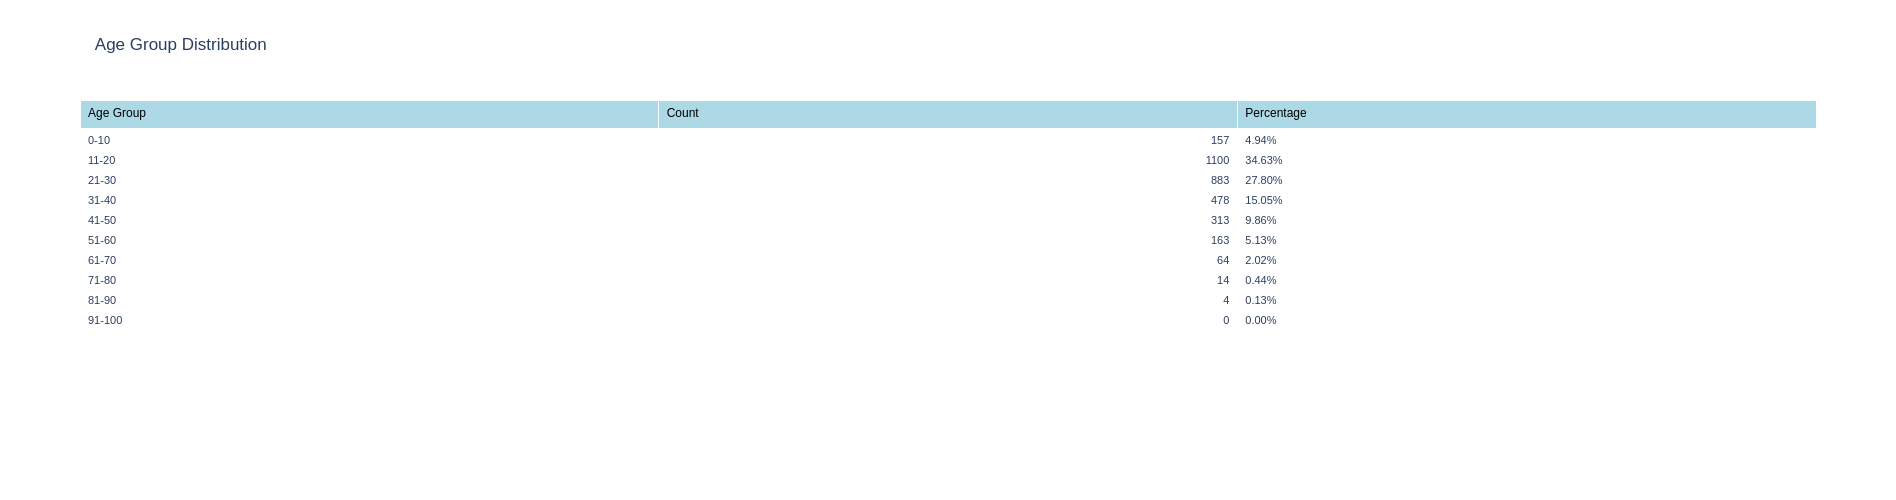


🏊 4. ACTIVITY ANALYSIS


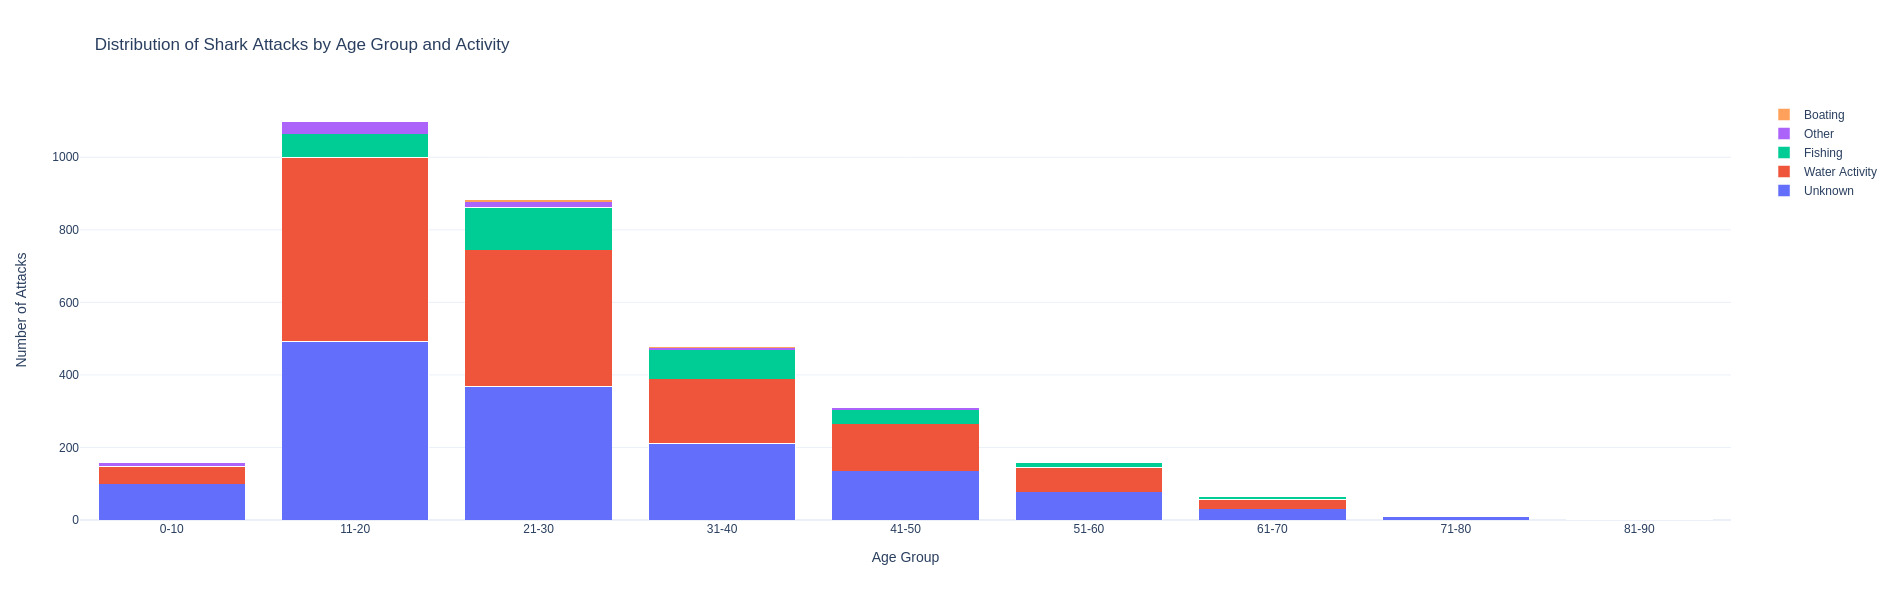

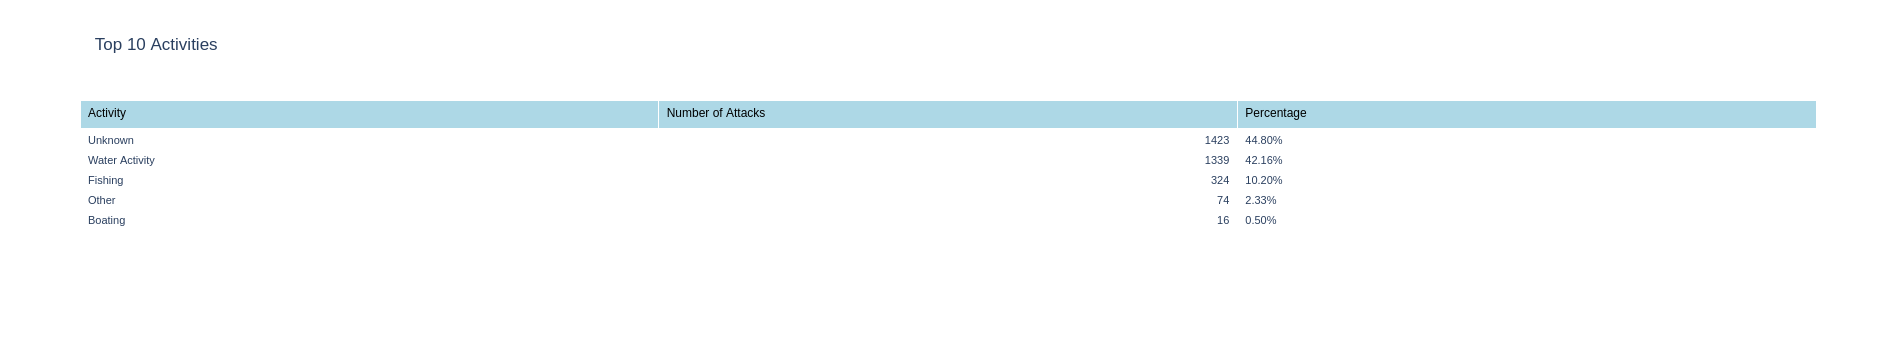

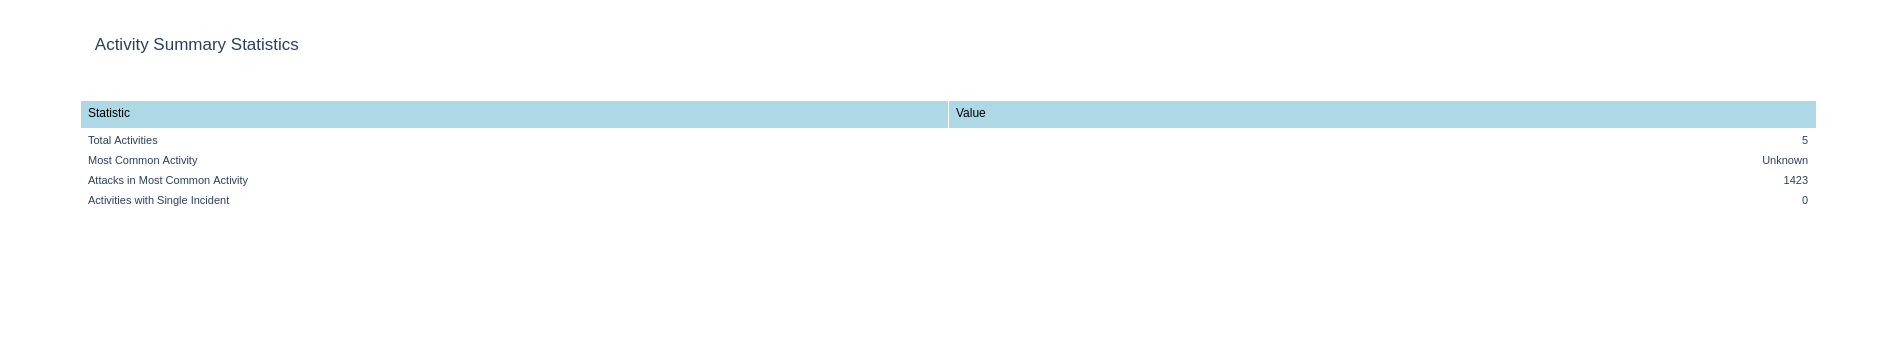


🦈 5. SPECIES ANALYSIS


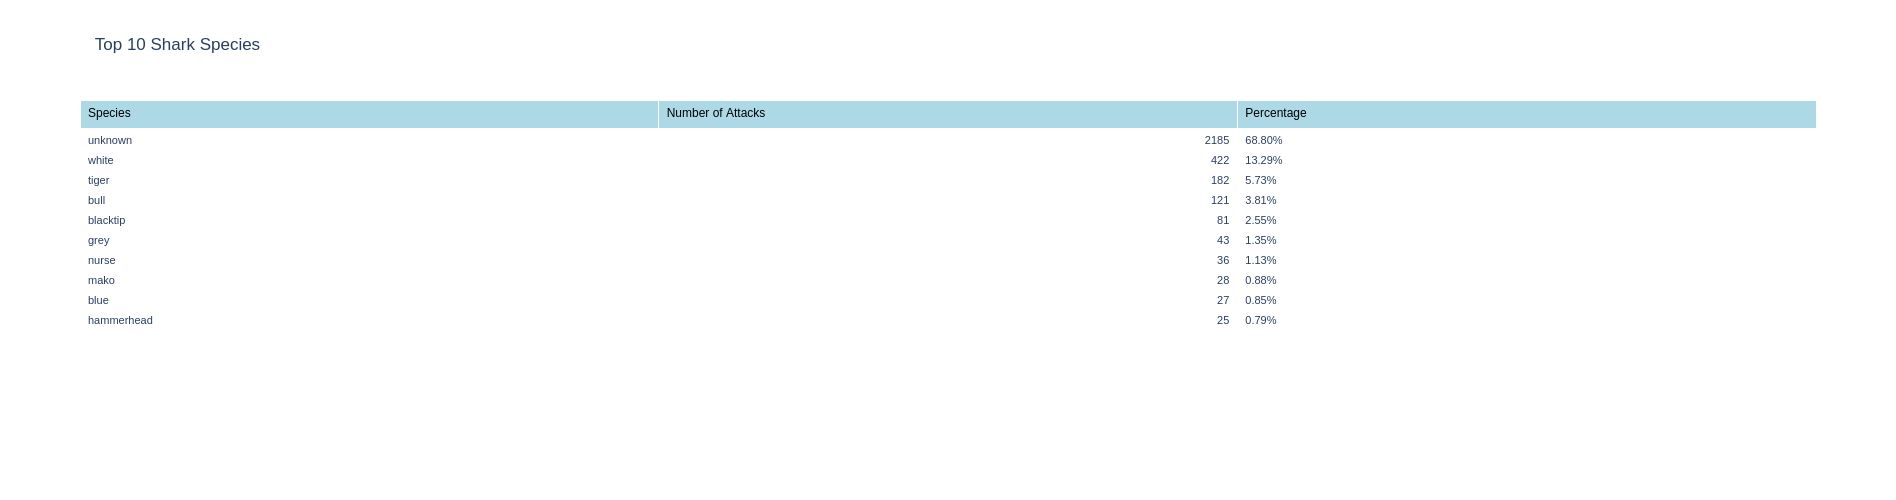

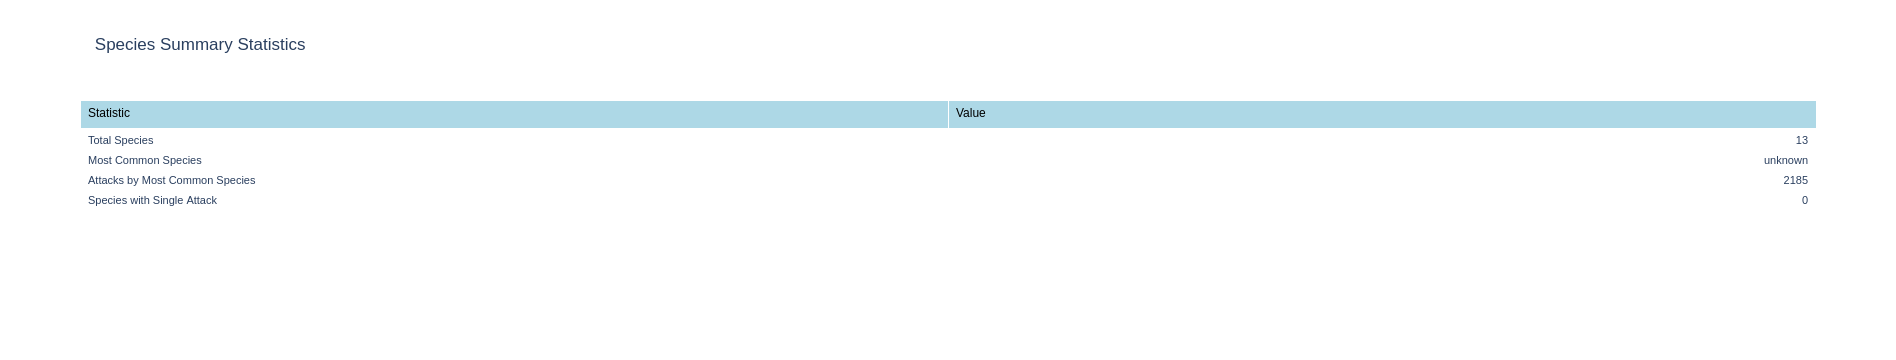


💀 6. FATALITY ANALYSIS


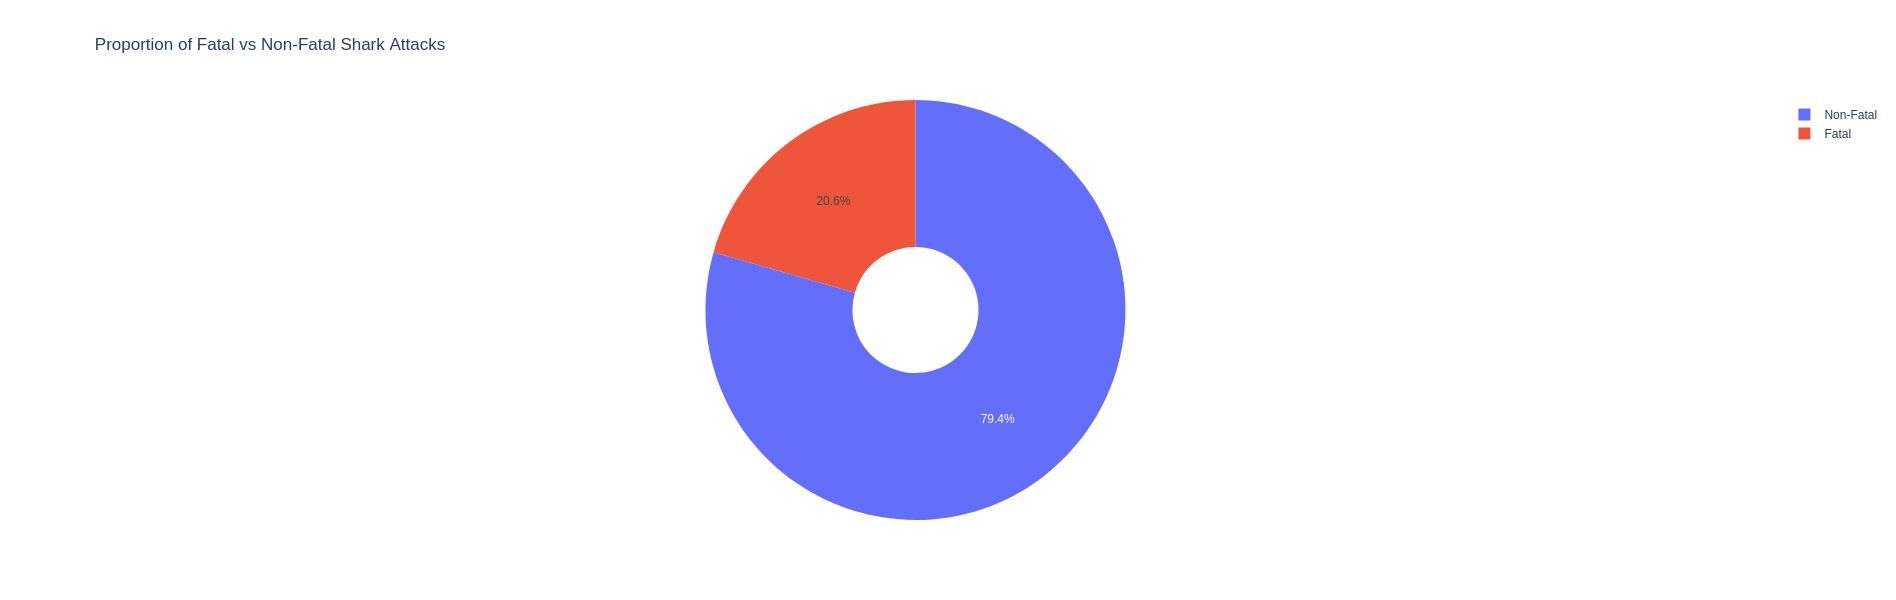

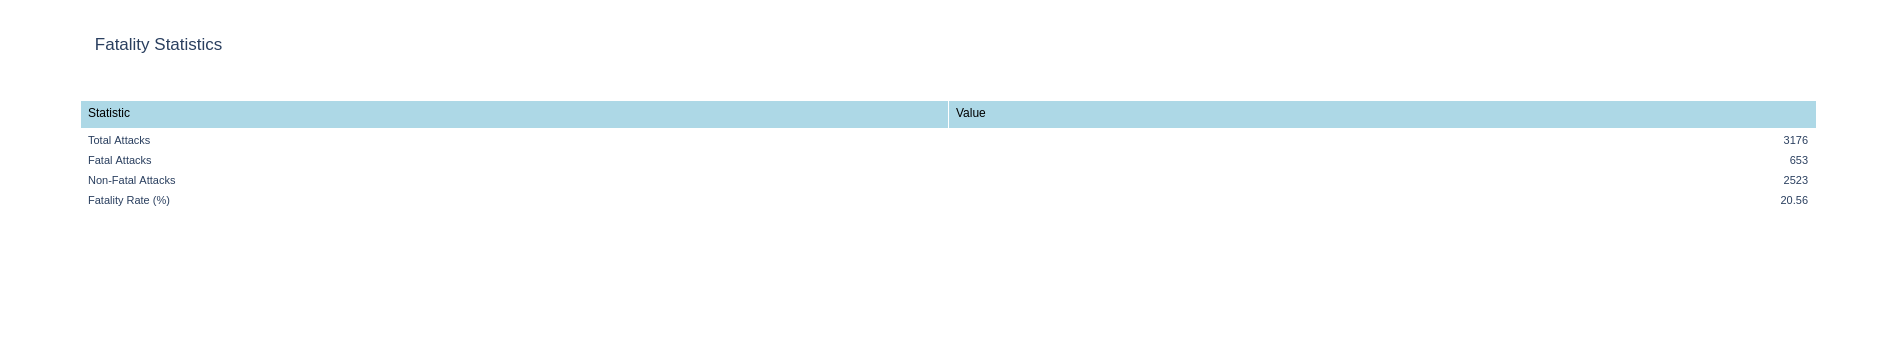

In [35]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

def create_interactive_table(df, title):
    """Create an interactive table using plotly"""
    fig = go.Figure(data=[go.Table(
        header=dict(
            values=list(df.columns),
            fill_color='lightblue',
            align='left',
            font=dict(size=12, color='black')
        ),
        cells=dict(
            values=[df[col] for col in df.columns],
            fill_color='white',
            align=['left' if isinstance(df[col].iloc[0], str) else 'right' for col in df.columns],
            font=dict(size=11)
        )
    )])
    
    fig.update_layout(
        title=title,
        width=800,
        height=400 if len(df) > 10 else 200 + len(df) * 30
    )
    
    return fig

def create_yearly_stats_table(df):
    """Create an interactive table of yearly statistics"""
    yearly_counts = df['Year'].value_counts().sort_index()
    
    stats_df = pd.DataFrame({
        'Statistic': [
            'Total Years Covered',
            'Year with Most Attacks',
            'Maximum Attacks in a Year',
            'Year with Least Attacks',
            'Minimum Attacks in a Year',
            'Average Attacks per Year'
        ],
        'Value': [
            len(yearly_counts),
            yearly_counts.idxmax(),
            yearly_counts.max(),
            yearly_counts.idxmin(),
            yearly_counts.min(),
            f"{yearly_counts.mean():.2f}"
        ]
    })
    
    return create_interactive_table(stats_df, 'Yearly Statistics Summary')

def create_geographic_stats_tables(df):
    """Create interactive tables for geographic statistics"""
    country_stats = df['Country'].value_counts()
    
    # Detailed country statistics
    country_details = pd.DataFrame({
        'Country': country_stats.index[:10],
        'Number of Attacks': country_stats.values[:10],
        'Percentage of Total': [f"{(x/len(df)*100):.2f}%" for x in country_stats.values[:10]]
    })
    
    # Summary statistics
    summary_stats = pd.DataFrame({
        'Statistic': [
            'Total Countries',
            'Top Country',
            'Attacks in Top Country',
            'Countries with Single Attack'
        ],
        'Value': [
            df['Country'].nunique(),
            country_stats.index[0],
            country_stats.values[0],
            sum(country_stats == 1)
        ]
    })
    
    return (
        create_interactive_table(country_details, 'Top 10 Countries by Number of Attacks'),
        create_interactive_table(summary_stats, 'Geographic Summary Statistics')
    )

def create_demographic_tables(df):
    """Create interactive tables for demographic analysis"""
    tables = {}
    
    # Sex statistics
    if 'Sex' in df.columns:
        sex_counts = df['Sex'].value_counts()
        sex_stats = pd.DataFrame({
            'Sex': sex_counts.index,
            'Count': sex_counts.values,
            'Percentage': [f"{(x/len(df)*100):.2f}%" for x in sex_counts.values]
        })
        tables['sex'] = create_interactive_table(sex_stats, 'Sex Distribution')
    
    # Age statistics
    if 'Age' in df.columns:
        age_stats = df['Age'].describe().round(2)
        age_stats_df = pd.DataFrame({
            'Statistic': age_stats.index,
            'Value': age_stats.values
        })
        tables['age'] = create_interactive_table(age_stats_df, 'Age Statistics')
        
        # Age group statistics
        if 'Age_Group' in df.columns:
            age_group_stats = df['Age_Group'].value_counts().sort_index()
            age_group_df = pd.DataFrame({
                'Age Group': age_group_stats.index,
                'Count': age_group_stats.values,
                'Percentage': [f"{(x/len(df)*100):.2f}%" for x in age_group_stats.values]
            })
            tables['age_groups'] = create_interactive_table(age_group_df, 'Age Group Distribution')
    
    return tables

def create_activity_tables(df):
    """Create interactive tables for activity analysis"""
    activity_counts = df['Activity'].value_counts()
    
    # Detailed activity statistics
    activity_details = pd.DataFrame({
        'Activity': activity_counts.index[:10],
        'Number of Attacks': activity_counts.values[:10],
        'Percentage': [f"{(x/len(df)*100):.2f}%" for x in activity_counts.values[:10]]
    })
    
    # Summary statistics
    summary_stats = pd.DataFrame({
        'Statistic': [
            'Total Activities',
            'Most Common Activity',
            'Attacks in Most Common Activity',
            'Activities with Single Incident'
        ],
        'Value': [
            df['Activity'].nunique(),
            activity_counts.index[0],
            activity_counts.values[0],
            sum(activity_counts == 1)
        ]
    })
    
    return (
        create_interactive_table(activity_details, 'Top 10 Activities'),
        create_interactive_table(summary_stats, 'Activity Summary Statistics')
    )

def create_species_tables(df):
    """Create interactive tables for species analysis"""
    if 'Specie' not in df.columns:
        return None
        
    species_counts = df['Specie'].value_counts()
    
    # Detailed species statistics
    species_details = pd.DataFrame({
        'Species': species_counts.index[:10],
        'Number of Attacks': species_counts.values[:10],
        'Percentage': [f"{(x/len(df)*100):.2f}%" for x in species_counts.values[:10]]
    })
    
    # Summary statistics
    summary_stats = pd.DataFrame({
        'Statistic': [
            'Total Species',
            'Most Common Species',
            'Attacks by Most Common Species',
            'Species with Single Attack'
        ],
        'Value': [
            df['Specie'].nunique(),
            species_counts.index[0],
            species_counts.values[0],
            sum(species_counts == 1)
        ]
    })
    
    return (
        create_interactive_table(species_details, 'Top 10 Shark Species'),
        create_interactive_table(summary_stats, 'Species Summary Statistics')
    )

def display_all_analyses(df):
    """
    Display all analyses with interactive tables
    """
    # Clean and prepare data
    print("\n📊 SHARK ATTACK ANALYSIS REPORT")
    print("="*50)
    df_clean = clean_and_prepare_data(df)
    
    # 1. Temporal Analysis
    print("\n📈 1. TEMPORAL ANALYSIS")
    temporal_fig = create_temporal_trend(df_clean)
    if temporal_fig:
        temporal_fig.show()
        create_yearly_stats_table(df_clean).show()
    
    # 2. Geographic Analysis
    print("\n🌎 2. GEOGRAPHIC ANALYSIS")
    country_results = analyze_attacks_by_country(df_clean)
    if country_results:
        country_fig, _ = country_results
        country_fig.show()
        country_details_table, country_summary_table = create_geographic_stats_tables(df_clean)
        country_details_table.show()
        country_summary_table.show()
    
    # 3. Demographic Analysis
    print("\n👥 3. DEMOGRAPHIC ANALYSIS")
    demo_results = analyze_demographics(df_clean)
    demo_tables = create_demographic_tables(df_clean)
    
    if 'sex' in demo_results:
        print("\n3.1 Analysis by Sex")
        demo_results['sex']['figure'].show()
        demo_tables['sex'].show()
    
    if 'age' in demo_results:
        print("\n3.2 Analysis by Age")
        demo_results['age']['figure'].show()
        demo_tables['age'].show()
        if 'age_groups' in demo_tables:
            demo_tables['age_groups'].show()
    
    # 4. Activity Analysis
    print("\n🏊 4. ACTIVITY ANALYSIS")
    activity_results = analyze_activities(df_clean)
    if activity_results:
        if 'figure' in activity_results:
            activity_results['figure'].show()
        
        activity_details_table, activity_summary_table = create_activity_tables(df_clean)
        activity_details_table.show()
        activity_summary_table.show()
    
    # 5. Species Analysis
    print("\n🦈 5. SPECIES ANALYSIS")
    species_tables = create_species_tables(df_clean)
    if species_tables:
        species_details_table, species_summary_table = species_tables
        species_details_table.show()
        species_summary_table.show()
    
    # 6. Fatality Analysis
    print("\n💀 6. FATALITY ANALYSIS")
    fatality_results = analyze_fatalities(df_clean)
    if fatality_results:
        fatality_results['figure'].show()
        fatality_stats_df = fatality_results['stats']
        create_interactive_table(fatality_stats_df, 'Fatality Statistics').show()

def run_complete_analysis(df):
    """
    Run and display complete analysis of shark attack data with interactive tables
    
    Parameters:
    df (pandas.DataFrame): The shark attack dataset
    """
    try:
        display_all_analyses(df)
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        requirements = pd.DataFrame({
            'Column': ['Year', 'Country', 'Sex', 'Age', 'Activity', 'Fatal', 'Specie'],
            'Type': ['numeric', 'string', 'string', 'numeric', 'string', 'boolean/Y/N', 'string'],
            'Required': ['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
        })
        create_interactive_table(requirements, 'Required DataFrame Columns').show()

if __name__ == "__main__":
    df = pd.read_csv('Shark_finish.csv')
    results = run_complete_analysis(df)
